In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change directory
os.chdir("/content/drive/MyDrive/data")
os.getcwd()

'/content/drive/MyDrive/data'

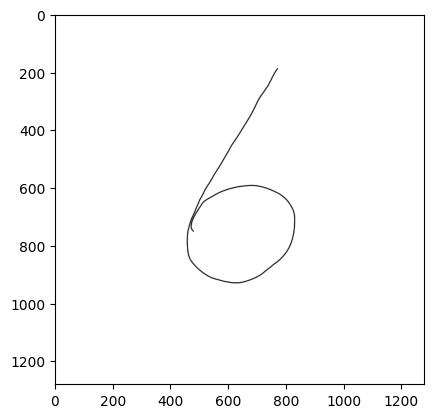

In [ ]:
img = image.load_img("Training/LetterR/LetterR_1.jpeg")
plt.imshow(img)

In [ ]:
cv2.imread("Training/LetterR/LetterR_1.jpeg").shape

(1280, 1280, 3)

In [ ]:
# Initialize ImageDataGenerators for training and validation datasets
data_generator_config = {'rescale': 1/255}
train_datagen = ImageDataGenerator(**data_generator_config)
validation_datagen = ImageDataGenerator(**data_generator_config)

# Setup training dataset
train_dataset = train_datagen.flow_from_directory(
    directory='Training/',
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

# Setup validation dataset
validation_dataset = validation_datagen.flow_from_directory(
    directory='Validation/',
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'LetterR': 0, 'LetterY': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 20,
                      validation_data = validation_dataset)


Epoch 1/20
5/5 [==============================] - 6s 1s/step - loss: 5.3301 - accuracy: 0.4286 - val_loss: 0.6973 - val_accuracy: 0.5125
Epoch 2/20
5/5 [==============================] - 7s 2s/step - loss: 0.7394 - accuracy: 0.5333 - val_loss: 0.7564 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 5s 992ms/step - loss: 0.7218 - accuracy: 0.6667 - val_loss: 0.6424 - val_accuracy: 0.5625
Epoch 4/20
5/5 [==============================] - 5s 1s/step - loss: 0.6017 - accuracy: 0.7143 - val_loss: 0.5326 - val_accuracy: 0.6750
Epoch 5/20
5/5 [==============================] - 6s 1s/step - loss: 0.8021 - accuracy: 0.7143 - val_loss: 1.3956 - val_accuracy: 0.5000
Epoch 6/20
5/5 [==============================] - 5s 1s/step - loss: 0.8194 - accuracy: 0.5333 - val_loss: 0.5103 - val_accuracy: 0.7000
Epoch 7/20
5/5 [==============================] - 6s 1s/step - loss: 0.5264 - accuracy: 0.5333 - val_loss: 0.4472 - val_accuracy: 0.7750
Epoch 8/20
5/5 [======================

In [ ]:
validation_dataset.class_indices

{'LetterR': 0, 'LetterY': 1}

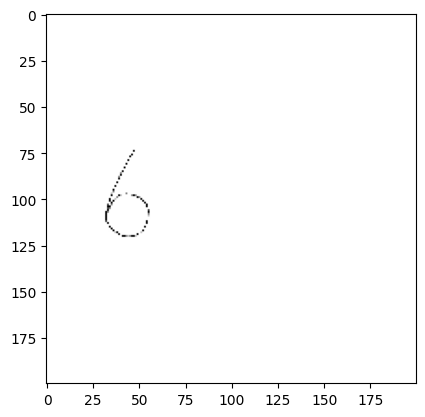

1/1 [==============================] - 0s 99ms/step
This is Letter 'ය' in Sinhala


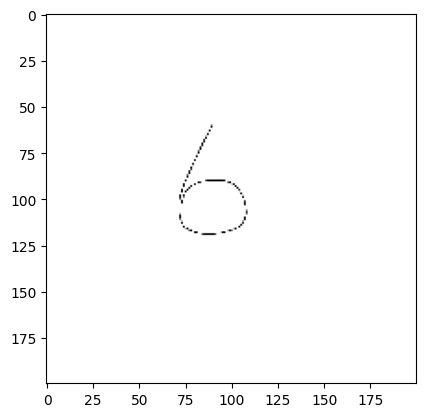

1/1 [==============================] - 0s 37ms/step
This is Letter 'ර' in Sinhala


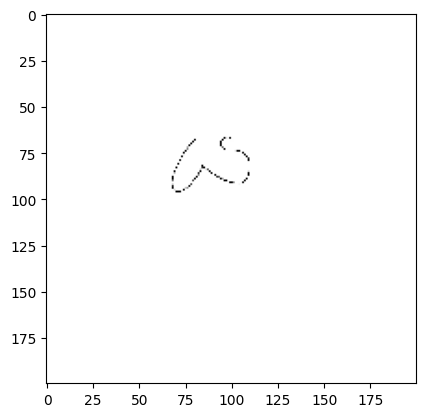

1/1 [==============================] - 0s 36ms/step
This is Letter 'ය' in Sinhala


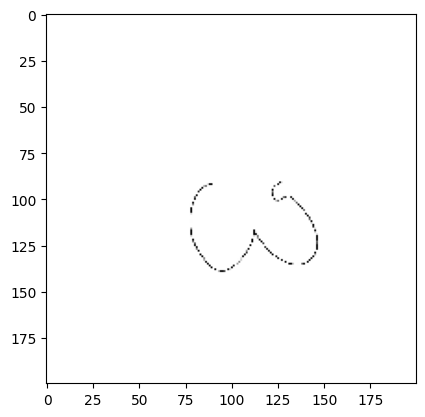

1/1 [==============================] - 0s 37ms/step
This is Letter 'ය' in Sinhala


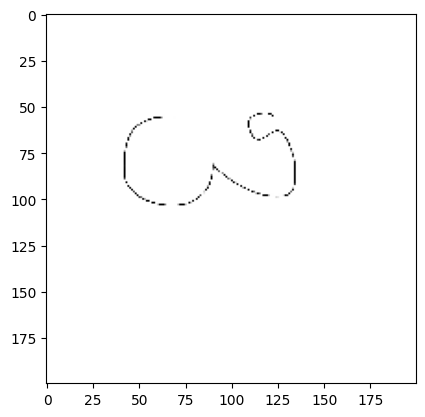

1/1 [==============================] - 0s 37ms/step
This is Letter 'ය' in Sinhala


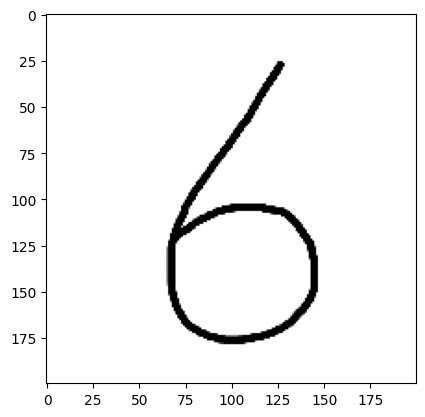

1/1 [==============================] - 0s 36ms/step
This is Letter 'ර' in Sinhala


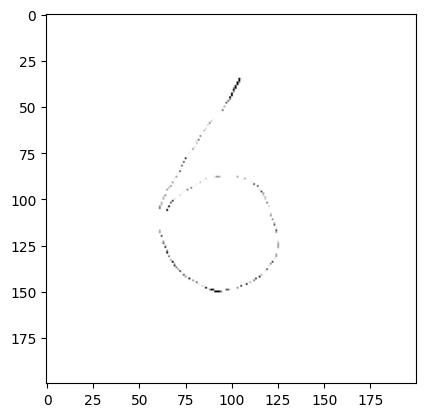

1/1 [==============================] - 0s 39ms/step
This is Letter 'ර' in Sinhala


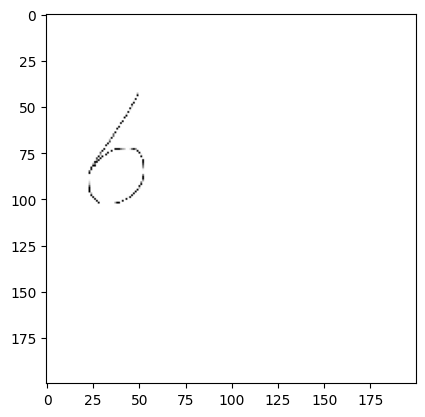

1/1 [==============================] - 0s 36ms/step
This is Letter 'ය' in Sinhala


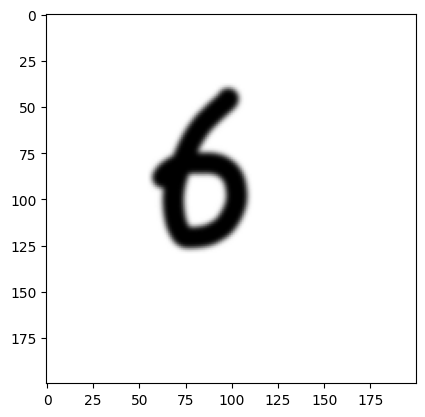

1/1 [==============================] - 0s 66ms/step
This is Letter 'ර' in Sinhala


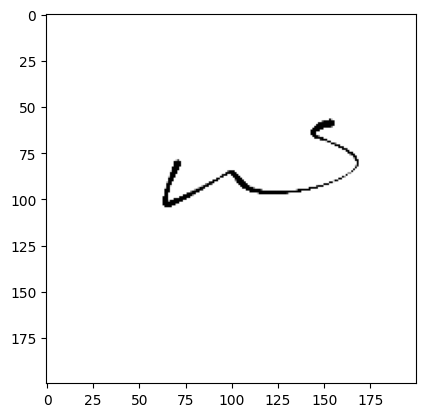

1/1 [==============================] - 0s 51ms/step
This is Letter 'ය' in Sinhala


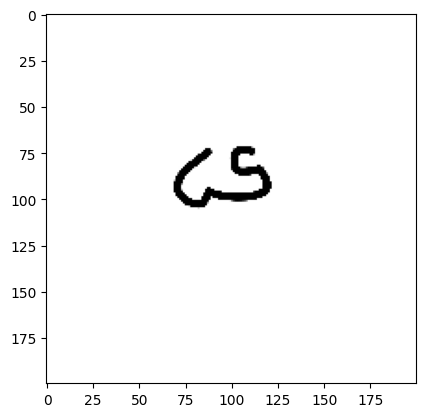

1/1 [==============================] - 0s 37ms/step
This is Letter 'ය' in Sinhala


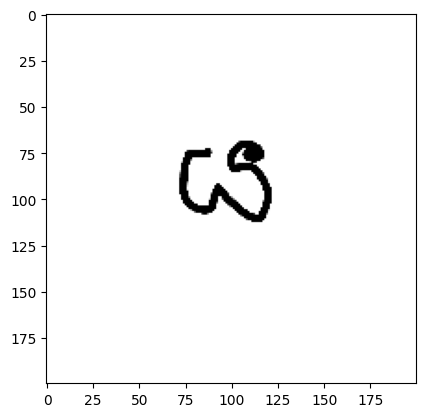

1/1 [==============================] - 0s 38ms/step
This is Letter 'ය' in Sinhala


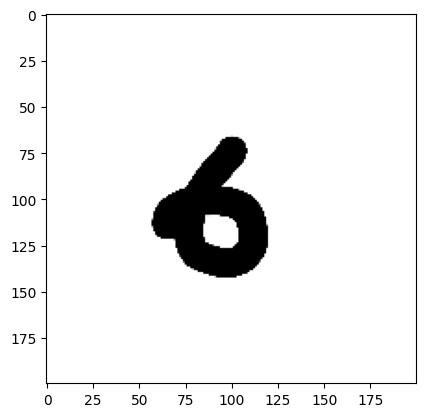

1/1 [==============================] - 0s 45ms/step
This is Letter 'ර' in Sinhala


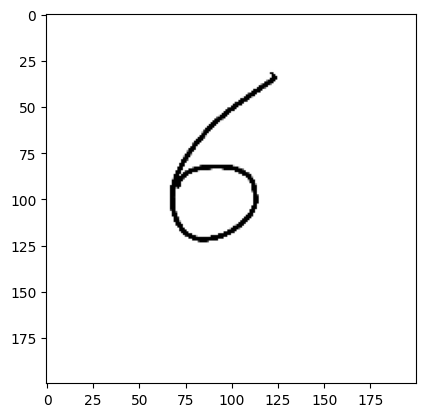

1/1 [==============================] - 0s 38ms/step
This is Letter 'ර' in Sinhala


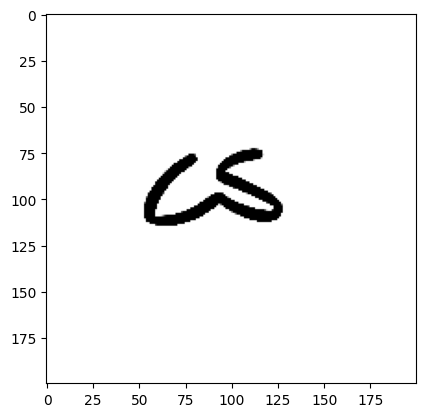

1/1 [==============================] - 0s 37ms/step
This is Letter 'ය' in Sinhala


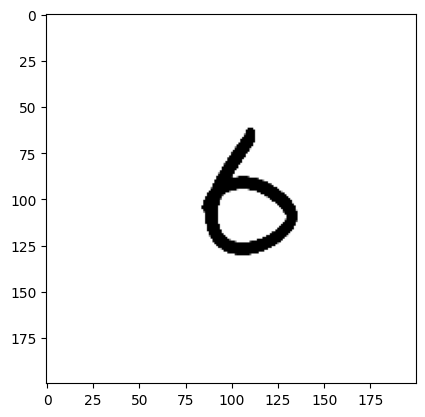

1/1 [==============================] - 0s 36ms/step
This is Letter 'ය' in Sinhala


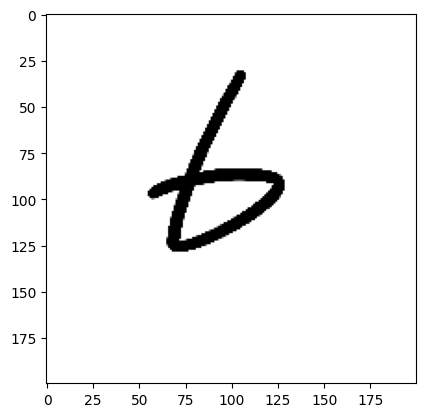

1/1 [==============================] - 0s 42ms/step
This is Letter 'ර' in Sinhala


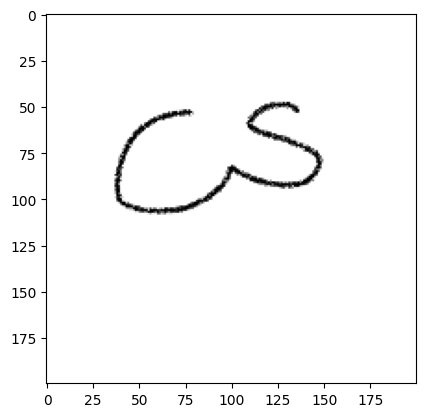

1/1 [==============================] - 0s 40ms/step
This is Letter 'ය' in Sinhala


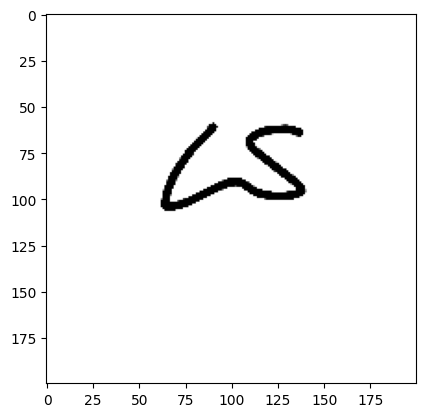

1/1 [==============================] - 0s 53ms/step
This is Letter 'ය' in Sinhala


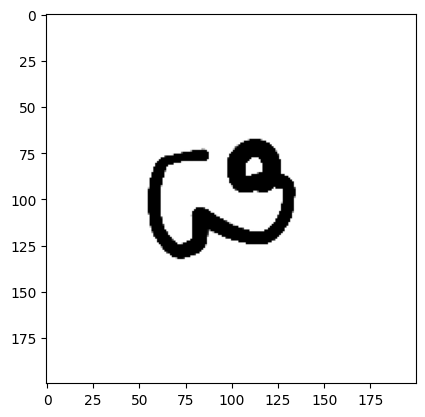

1/1 [==============================] - 0s 54ms/step
This is Letter 'ය' in Sinhala


In [ ]:
dir_path = 'Testing/'

for i in os.listdir(dir_path):

  file_path = os.path.join(dir_path, i)
  if os.path.isfile(file_path):
    # Load the image and resize it to the target size
    img = image.load_img(dir_path + i,target_size=(200,200))

    # Display the image using matplotlib
    plt.imshow(img)
    plt.show()

  # Convert the image to a NumPy array and add an extra dimension
  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)

  # Stack the array vertically to create a batch of images
  images = np.vstack([X])

  # Make a prediction using the trained model
  val = model.predict(images)

  # Check the predicted value and print the corresponding class label
  if val == 0:
    print("This is Letter 'ර' in Sinhala")
  else:
    print("This is Letter 'ය' in Sinhala")

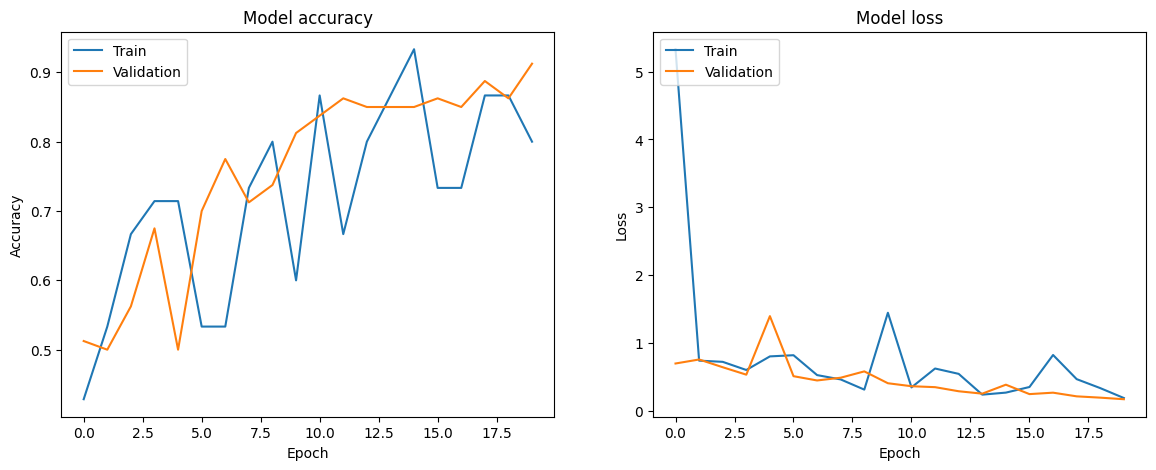

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'], label='Train')
plt.plot(model_fit.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'], label='Train')
plt.plot(model_fit.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()